# Otus Machine Learning Course. Homework №3
### Воротников Владимир

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

import time

## EDA

Датасет взять отсюда: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Описание:
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [2]:
data = pd.read_csv('data/online_shoppers_intention.csv')

In [3]:
data.shape

(12330, 18)

In [4]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

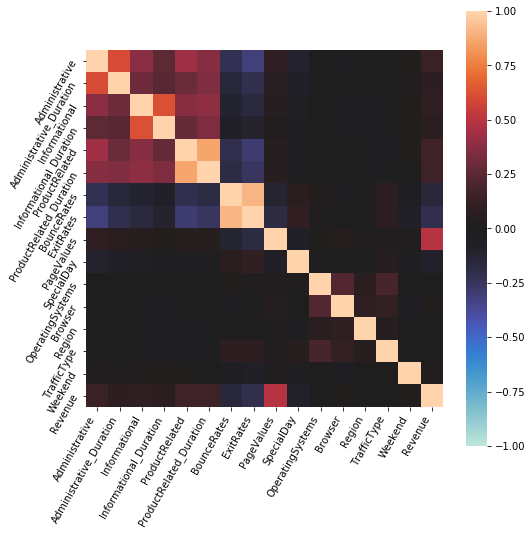

In [7]:
data_corr = data.corr() 
# Нарисуем heatmap для матрицы корреляций

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(
    data_corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=60,
)
ax.plot();

In [8]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [9]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
TARGET = 'Revenue'

In [11]:
print(data[data['Revenue'] == False].Revenue.count())
print(data[data['Revenue'] == True].Revenue.count())

10422
1908


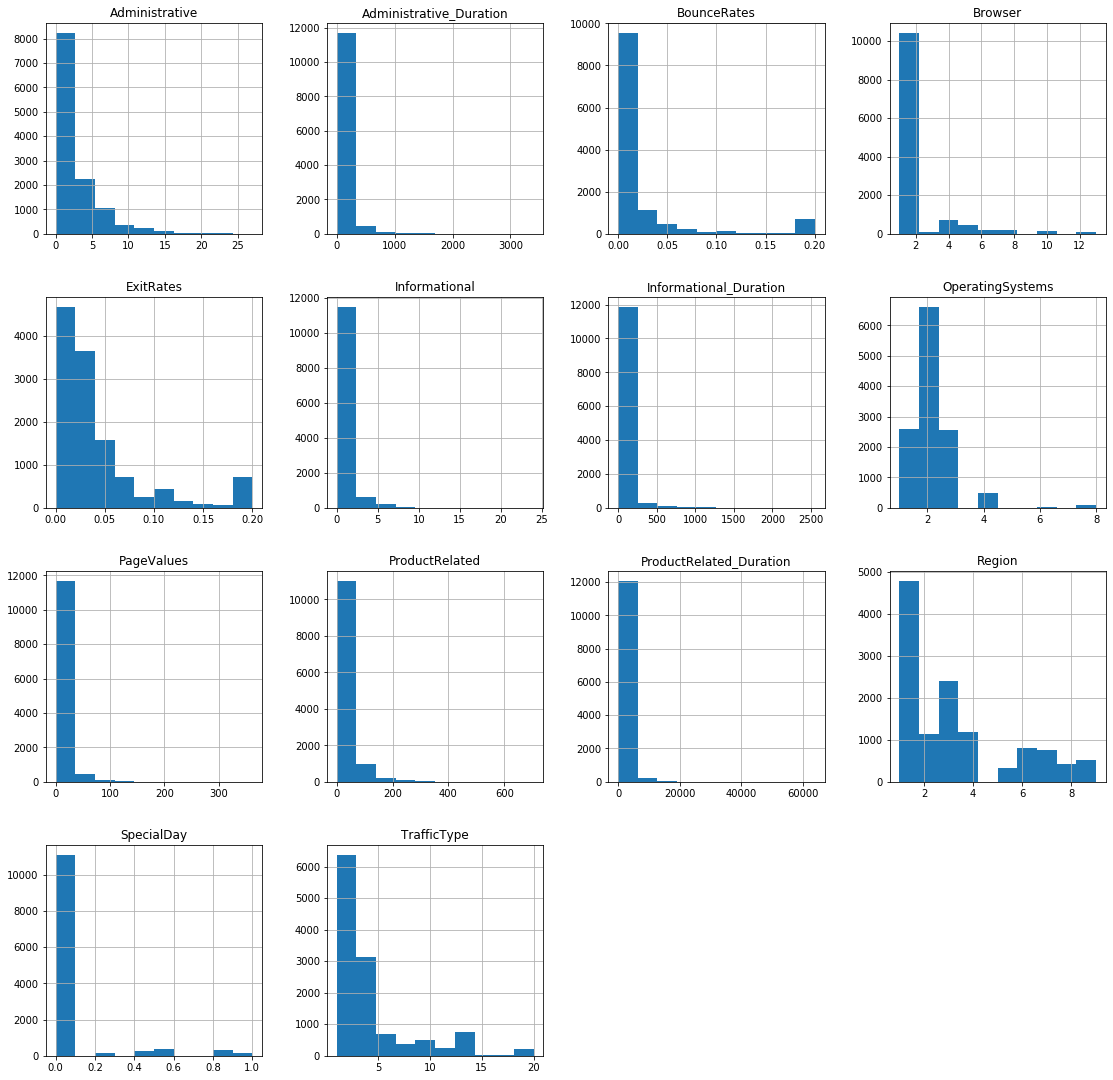

In [12]:
data.select_dtypes(include = ['float64', 'int64', 'object']).hist(figsize=(19,19));

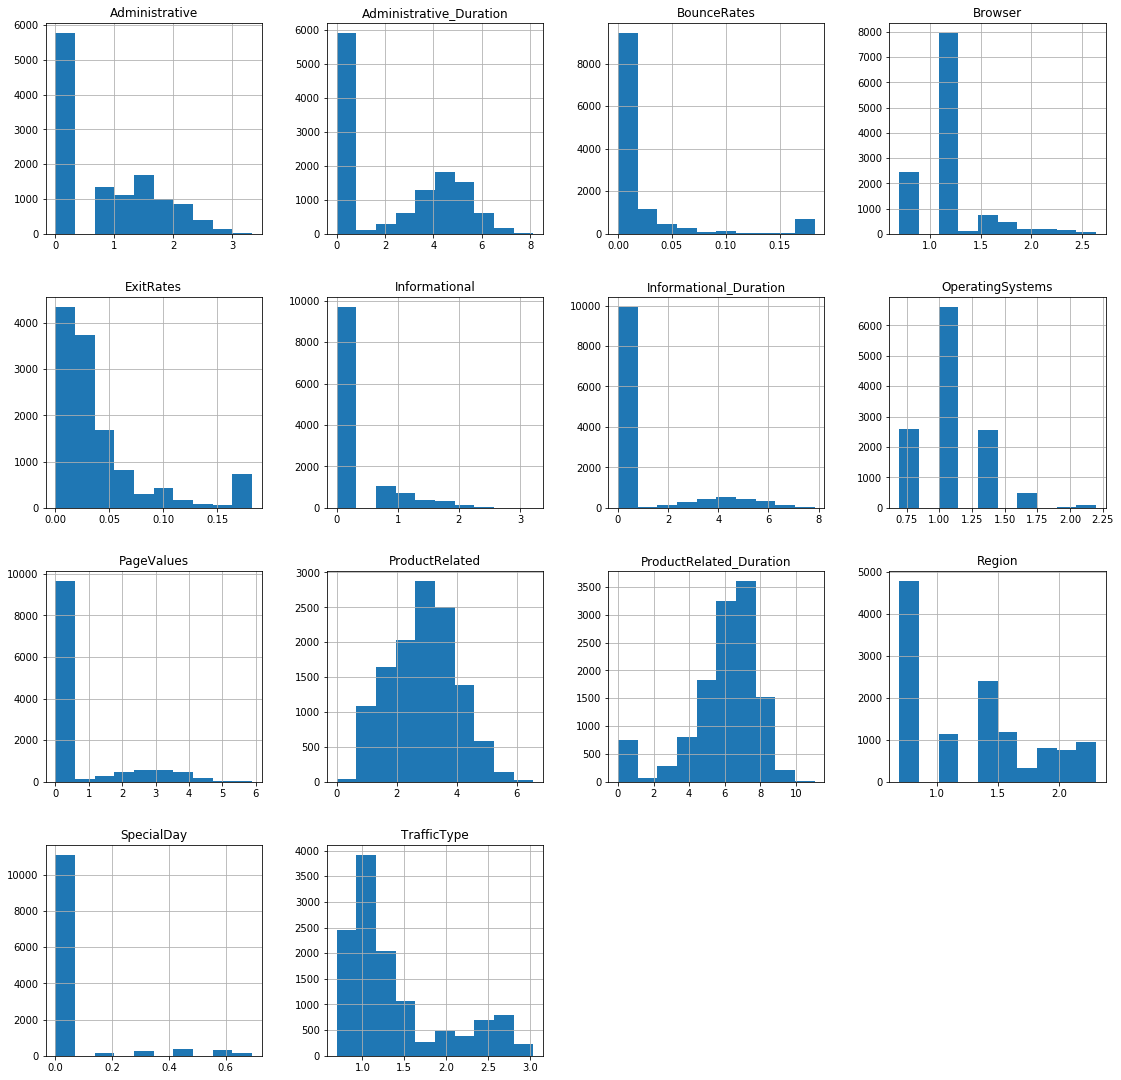

In [13]:
np.log(data.select_dtypes(include = ['float64', 'int64'])+1).hist(figsize=(19,19));

### Month and VisitorType to Labels

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_month = LabelEncoder()
le_month.fit(data.Month)

le_vis = LabelEncoder()
le_vis.fit(data.VisitorType)

LabelEncoder()

In [16]:
le_month.classes_
data.Month = le_month.transform(data.Month)
data.VisitorType = le_vis.transform(data.VisitorType)

In [17]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [18]:
data_basic = data.copy(deep=True)

## Feature engineering 

Ни одна из попыток улучшения признаков не привела к улучшению качества :(

## Boosting with default hyperparameters

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [20]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}\n".format(
        accuracy, precision, recall, f1
    ))

In [21]:
y = data_basic[TARGET]
X = data_basic.drop(TARGET, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [22]:
default_scoring = pd.DataFrame({"Default scoring":["f1_score (cv)"]})

### Sklearn GradientBoosting 

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=37)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [24]:
quality(y_pred, y_test)

Accuracy:  0.904
Precision: 0.603
Recall:    0.730
F1-score:  0.661



In [25]:
scores = cross_val_score(clf, X, y, cv=10, scoring='f1')
print("F1-score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std()))

F1-score: 0.626 (+/- 0.05)


In [26]:
default_scoring['Sklearn'] = scores.mean()
display(default_scoring)

,Default scoring,Sklearn
0,f1_score (cv),0.626054


### XGBoost

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=37)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [28]:
quality(y_pred, y_test)

Accuracy:  0.908
Precision: 0.616
Recall:    0.747
F1-score:  0.675



In [29]:
scores = cross_val_score(xgb_model, X, y, cv=10, scoring='f1')
print("F1-score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std()))

F1-score: 0.621 (+/- 0.05)


In [30]:
default_scoring['XGBoost'] = scores.mean()
display(default_scoring)

,Default scoring,Sklearn,XGBoost
0,f1_score (cv),0.626054,0.620617


### CatBoost 

In [32]:
import catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(silent=True, random_state=37)
catboost_model.fit(X_train, y_train);

In [33]:
y_pred = catboost_model.predict(X_test)

In [34]:
y_pred

array(['False', 'False', 'False', ..., 'True', 'False', 'True'],
      dtype=object)

In [35]:
y_pred[y_pred=='False']=False
y_pred[y_pred=='True']=True
y_pred = y_pred.astype('bool')

In [36]:
quality(y_pred, y_test)

Accuracy:  0.904
Precision: 0.608
Recall:    0.728
F1-score:  0.662



In [37]:
y_str = y.copy(deep=True)
y_str[y_str==False]="False"
y_str[y_str==True]="True"

In [38]:
from functools import partial, update_wrapper
from sklearn.metrics import  make_scorer

def wrapped_partial(func, *args, **kwargs):
    partial_func = partial(func, *args, **kwargs)
    update_wrapper(partial_func, func)
    return partial_func

custom_scorer = make_scorer(wrapped_partial(f1_score, pos_label="True"))

scores = cross_val_score(catboost_model, X, y_str, cv=10, scoring=custom_scorer)

print("F1-score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std()))

F1-score: 0.594 (+/- 0.08)


In [39]:
default_scoring['CatBoost'] = scores.mean()
display(default_scoring)

,Default scoring,Sklearn,XGBoost,CatBoost
0,f1_score (cv),0.626054,0.620617,0.594464


###  LightGBM

In [40]:
from lightgbm import LGBMClassifier

In [41]:
lgb_model = LGBMClassifier(random_state=37)
lgb_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
y_pred = lgb_model.predict(X_test)

In [43]:
quality(y_pred, y_test)

Accuracy:  0.899
Precision: 0.587
Recall:    0.711
F1-score:  0.643



In [44]:
scores = cross_val_score(lgb_model, X, y, cv=10, scoring='f1')
print("F1-score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std()))

F1-score: 0.603 (+/- 0.06)


In [45]:
default_scoring['LightGBM'] = scores.mean()
display(default_scoring)

,Default scoring,Sklearn,XGBoost,CatBoost,LightGBM
0,f1_score (cv),0.626054,0.620617,0.594464,0.603158


## Optimizing hyperparameters

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
tuned_scoring = pd.DataFrame({"Parameter":["accuracy", "presicion", "recall", "f1_score", "training_time"]})
def add_scoring(name, acc, pres, rec, f1, time, table=tuned_scoring ):
    table[name] = pd.Series([acc, pres,rec,f1,time])

### Sklearn

In [48]:
parameters = {'n_estimators':[50, 100, 150, 200], 'max_depth':[2, 3, 4], 'max_leaf_nodes':[2, 5, 10]}
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, parameters, scoring='f1') 
clf.fit(X, y);

In [49]:
clf.best_params_

{'max_depth': 3, 'max_leaf_nodes': 5, 'n_estimators': 150}

In [50]:
clf.best_score_

0.6447380212159576

In [51]:
clf_optimized = GradientBoostingClassifier(max_depth=3, max_leaf_nodes=5, n_estimators=150)

In [52]:
from sklearn.model_selection import cross_validate
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1_score': 'f1'}
scores = cross_validate(clf_optimized, X, y, cv=10, scoring=scoring)

In [53]:
add_scoring('sklearn',
            scores['test_accuracy'].mean(),
            scores['test_precision'].mean(),
            scores['test_recall'].mean(),
            scores['test_f1_score'].mean(),
            scores['fit_time'].mean()
           )

In [54]:
display(tuned_scoring)

,Parameter,sklearn
0,accuracy,0.892052
1,presicion,0.711416
2,recall,0.562295
3,f1_score,0.616781
4,training_time,1.724792


### XGBoost

In [55]:
parameters = {'max_depth':[2,4,6,8], 'subsample':[0.2, 0.3, 0.5, 0.7, 1]}
xgb_model = xgb.XGBClassifier()
xgb_clf = GridSearchCV(xgb_model, parameters, scoring='f1') 
xgb_clf.fit(X, y);

In [56]:
xgb_clf.best_params_

{'max_depth': 2, 'subsample': 0.3}

In [57]:
xgb_clf.best_score_

0.6319958814236132

In [58]:
xgb_optimized = xgb.XGBClassifier(max_depth=2, subsample=0.3)
scores = cross_validate(xgb_optimized, X, y, cv=10, scoring=scoring)
add_scoring('XGBoost',
            scores['test_accuracy'].mean(),
            scores['test_precision'].mean(),
            scores['test_recall'].mean(),
            scores['test_f1_score'].mean(),
            scores['fit_time'].mean()
           )

In [59]:
display(tuned_scoring)

,Parameter,sklearn,XGBoost
0,accuracy,0.892052,0.892863
1,presicion,0.711416,0.698596
2,recall,0.562295,0.575982
3,f1_score,0.616781,0.626070
4,training_time,1.724792,0.325829


### Catboost

In [60]:
parameters = {'max_depth':[2, 4, 6, 8], "subsample":[0.2, 0.5, 0.8, 1]}
catboost_model = CatBoostClassifier(verbose=False)
custom_scorer = make_scorer(wrapped_partial(f1_score, pos_label="True"))
catboost_clf = GridSearchCV(catboost_model, parameters, scoring=custom_scorer) 
catboost_clf.fit(X, y_str);

In [61]:
catboost_clf.best_params_

{'max_depth': 2, 'subsample': 1}

In [62]:
catboost_clf.best_score_

0.6324152793063058

In [63]:
catboost_optimized = CatBoostClassifier(max_depth=2, subsample=1, verbose=False)

scoring_cat = {'accuracy': 'accuracy',
           'precision': make_scorer(wrapped_partial(precision_score, pos_label="True")),
           'recall': make_scorer(wrapped_partial(recall_score, pos_label="True")),
           'f1_score': make_scorer(wrapped_partial(f1_score, pos_label="True"))}

scores = cross_validate(catboost_optimized, X, y_str, cv=10, scoring=scoring_cat)

In [64]:
add_scoring('CatBoost',
            scores['test_accuracy'].mean(),
            scores['test_precision'].mean(),
            scores['test_recall'].mean(),
            scores['test_f1_score'].mean(),
            scores['fit_time'].mean()
           )

In [65]:
display(tuned_scoring)

,Parameter,sklearn,XGBoost,CatBoost
0,accuracy,0.892052,0.892863,0.891565
1,presicion,0.711416,0.698596,0.706790
2,recall,0.562295,0.575982,0.558096
3,f1_score,0.616781,0.626070,0.613881
4,training_time,1.724792,0.325829,2.492442


### LightGBM

In [66]:
parameters = {'max_depth':[2, 4, 7, 8, 9],
              "subsample":[0.1, 0.2, 0.5],
              "n_estimators":[30, 40, 50, 100],
              "num_leaves":[26, 31, 36] }

lgbm_model = LGBMClassifier()
lgbm_clf = GridSearchCV(lgbm_model, parameters, scoring='f1') 
lgbm_clf.fit(X, y);

In [67]:
lgbm_clf.best_params_

{'max_depth': 7, 'n_estimators': 40, 'num_leaves': 31, 'subsample': 0.1}

In [68]:
lgbm_clf.best_score_

0.6434172576262353

In [69]:
lgbm_optimized = LGBMClassifier(max_depth=7, subsample=0.1, n_estimators=40)
scores = cross_validate(lgbm_optimized, X, y, cv=10, scoring=scoring)
add_scoring('LightGBM',
            scores['test_accuracy'].mean(),
            scores['test_precision'].mean(),
            scores['test_recall'].mean(),
            scores['test_f1_score'].mean(),
            scores['fit_time'].mean()
           )

In [70]:
display(tuned_scoring)

,Parameter,sklearn,XGBoost,CatBoost,LightGBM
0,accuracy,0.892052,0.892863,0.891565,0.892295
1,presicion,0.711416,0.698596,0.706790,0.707580
2,recall,0.562295,0.575982,0.558096,0.553442
3,f1_score,0.616781,0.626070,0.613881,0.613776
4,training_time,1.724792,0.325829,2.492442,0.047473
